In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np

# 데이터 로딩
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
data = pd.read_csv(url)
data = data.drop(columns='id',axis=1)

# 원핫 인코딩 적용
data = pd.get_dummies(data, columns=['Sex'])

# 레이블 인코더 초기화
encoder = LabelEncoder()
# 레이블 인코딩 적용
data['Rings'] = encoder.fit_transform(data['Rings'])


# 데이터의 처음 몇 줄을 확인
print(data.head())


   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.150     14  False  False   True  
1         0.070      6  False  False   True  
2         0.210      8   True  False  False  
3         0.155      9  False  False   True  
4         0.055      6  False   True  False  


In [116]:
# 'label_column' 컬럼의 고유값 및 개수 확인
label_counts = data['Rings'].value_counts()
print(label_counts)

Rings
8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: count, dtype: int64


In [117]:
data['Sex_M'] = data['Sex_M'].astype(int)
data['Sex_F'] = data['Sex_F'].astype(int)
data['Sex_I'] = data['Sex_I'].astype(int)

# 데이터의 처음 몇 줄을 확인
print(data.head())


   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.150     14      0      0      1  
1         0.070      6      0      0      1  
2         0.210      8      1      0      0  
3         0.155      9      0      0      1  
4         0.055      6      0      1      0  


In [118]:
# 데이터의 기본적인 정보 확인
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole_weight    4177 non-null   float64
 4   Shucked_weight  4177 non-null   float64
 5   Viscera_weight  4177 non-null   float64
 6   Shell_weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Sex_F           4177 non-null   int32  
 9   Sex_I           4177 non-null   int32  
 10  Sex_M           4177 non-null   int32  
dtypes: float64(7), int32(3), int64(1)
memory usage: 310.1 KB
None


In [119]:
# 데이터의 기술적 통계량 보기
print(data.describe())

            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings        Sex_F        Sex_I  \
count     4177.000000   4177.000000  4177.000000  4177.000000  4177.000000   
mean         0.180594      0.238831     8.933445     0.312904     0.321283   
std          0.109614      0.139203     3.222790     0.463731  

In [120]:
# 결측치 확인
print(data.isnull().sum())

Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64


In [121]:
# 각 컬럼의 중간값 계산
# median_values = data.median()

# 결측치를 중간값으로 채우기
# data_filled = data.fillna(median_values)

# 결측치 채워진 데이터 확인
# print(data_filled.info())

# 결측치가 있는 행 제거
# data_clean = data.dropna()

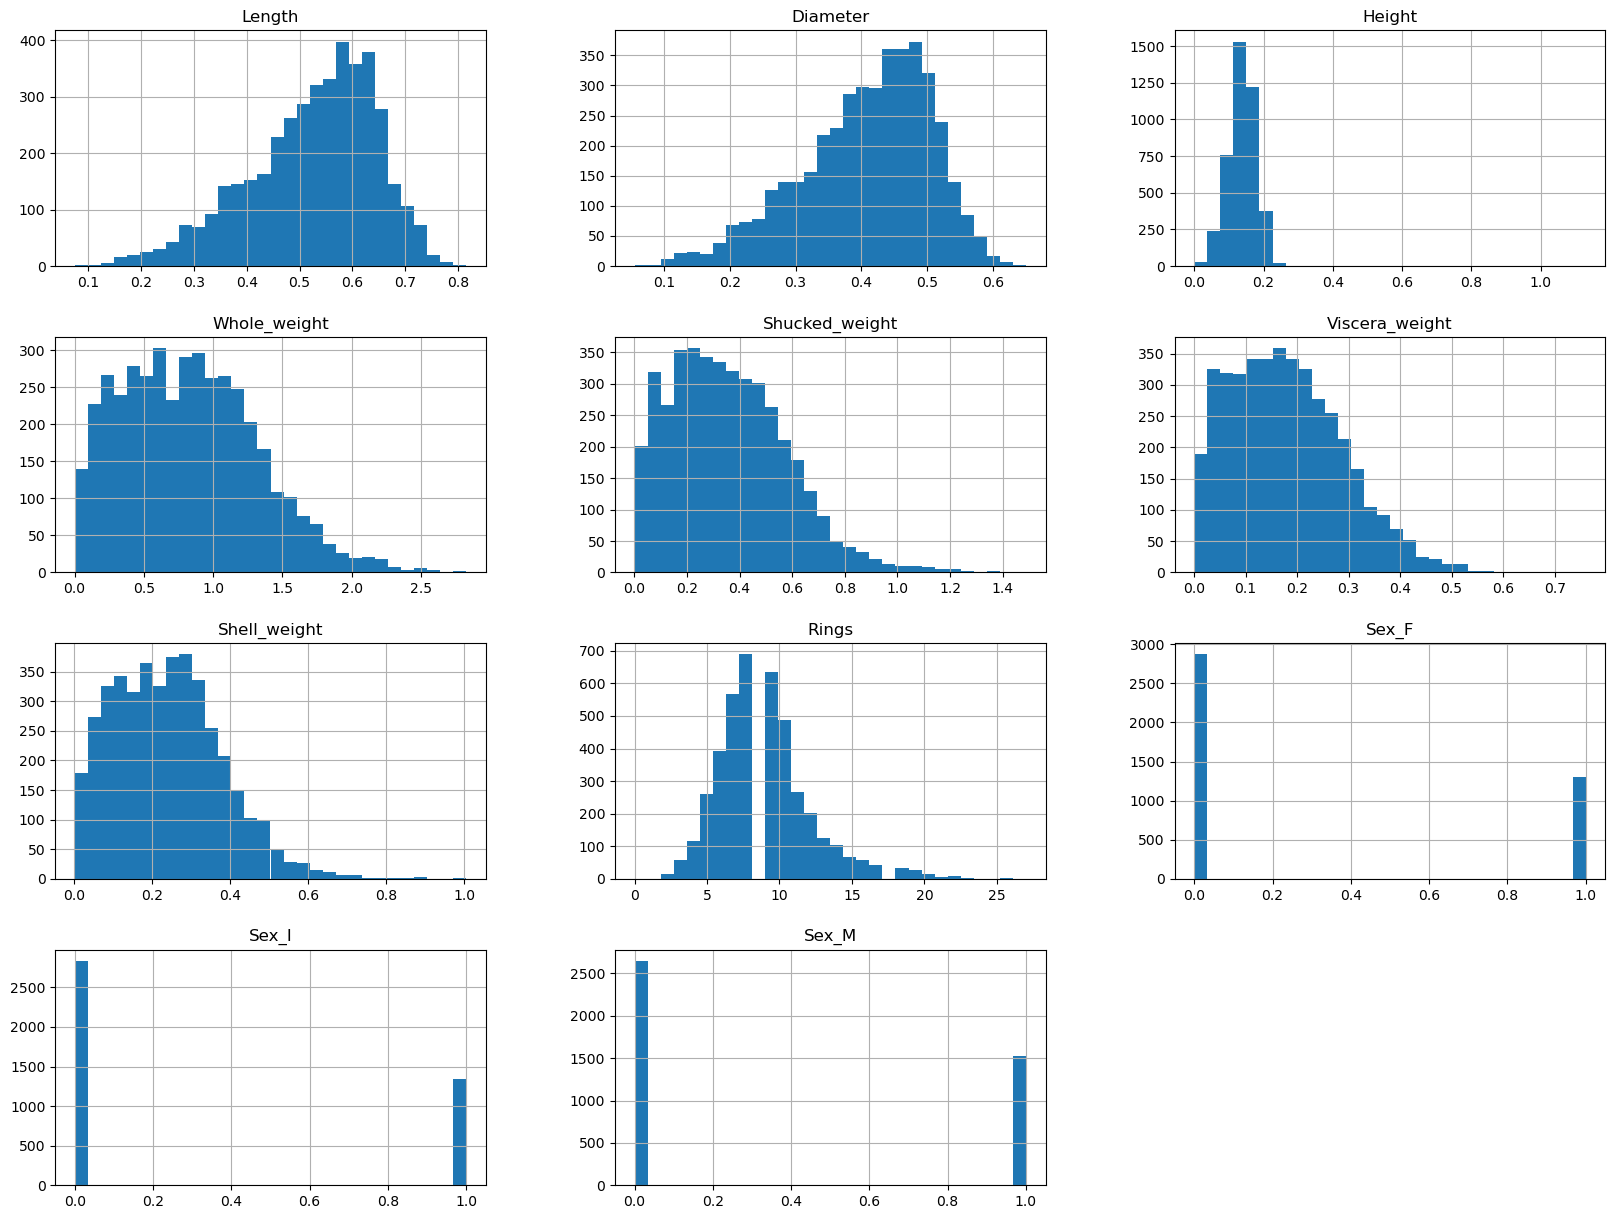

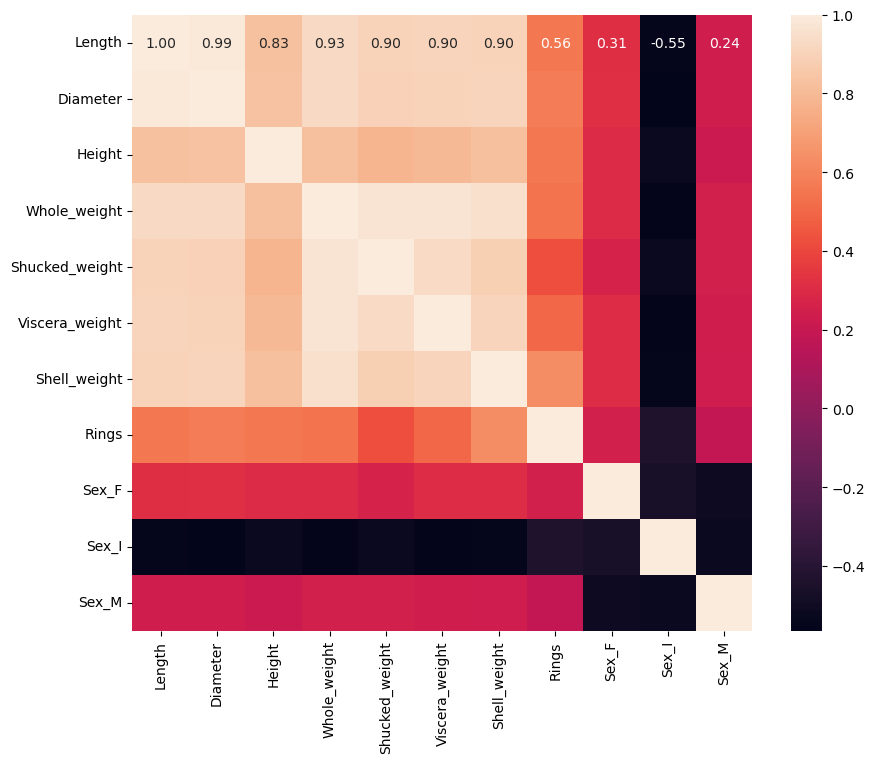

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램으로 변수 분포 보기
data.hist(bins=30, figsize=(20, 15))
plt.show()

# 변수 간의 상관관계를 히트맵으로 보기
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터를 특성과 타겟으로 분리
X = data.drop('Rings', axis=1)
y = data['Rings']

# 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler

# 스케일러 초기화
scaler = StandardScaler()

# 훈련 데이터에만 fit을 수행해야 합니다.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 선형 회귀 모델 생성 및 훈련
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측 및 평가
predictions_lr = model_lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)

print(f'Linear Regression - Mean Squared Error: {mse_lr}')
print(f'Linear Regression - R^2 Score: {r2_lr}')

Linear Regression - Mean Squared Error: 4.8914076515702725
Linear Regression - R^2 Score: 0.5481466289351492


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 로지스틱 회귀 모델 생성 및 훈련
model_log = LogisticRegression()
model_log.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측 및 평가
predictions_log = model_log.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, predictions_log)
conf_matrix_log = confusion_matrix(y_test, predictions_log)

print(f'Logistic Regression - Accuracy: {accuracy_log}')
print(f'Logistic Regression - Confusion Matrix:\n{conf_matrix_log}')


Logistic Regression - Accuracy: 0.2799043062200957
Logistic Regression - Confusion Matrix:
[[ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 10 10  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 18 17  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12 31 28 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 10 44 34  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 36 53 36  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 22 45 44 19  2  3  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 10 21 32 24  1  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  5  7 17 15  0  5  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  3  5 10 10  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5 13  3  0  4  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 11  2  0  4  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  4  1  4  0  1  0  1  0  

C:\Users\Hyeon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 모델 생성
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),  # 입력층
    Dropout(0.5),  # 과적합 방지를 위한 드롭아웃
    Dense(128, activation='relu'),  # 은닉층
    Dense(64, activation='relu'),  # 은닉층
    Dense(1)  # 출력층
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [127]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 44.2778 - mae: 5.3654 - val_loss: 6.5416 - val_mae: 1.8877
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6229 - mae: 1.9758 - val_loss: 5.8515 - val_mae: 1.7370
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5974 - mae: 1.9951 - val_loss: 5.4987 - val_mae: 1.6570
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1033 - mae: 1.9363 - val_loss: 5.1407 - val_mae: 1.6578
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9569 - mae: 1.8987 - val_loss: 5.3129 - val_mae: 1.5163
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5666 - mae: 1.8528 - val_loss: 4.8628 - val_mae: 1.7021
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3555 - mae: 1.8181 - val_loss: 4.5269 - val_mae: 1.4552
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0732 - mae: 1.7997 - val_loss: 4.3506 - val_mae: 1.4611
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0352 - mae:

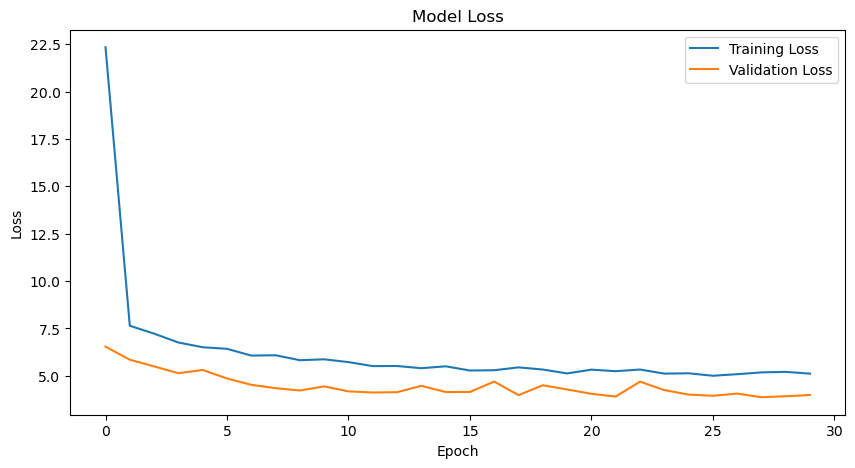

In [128]:
import matplotlib.pyplot as plt

# 손실 그래프
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [129]:
# 테스트 데이터에 대한 평가
results = model.evaluate(X_test, y_test, verbose=1)
test_loss = results[0]
test_mae = results[1]

print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 4.9824 - mae: 1.5127
Test Loss: 4.687866687774658
Test MAE: 1.4785066843032837


In [130]:
from sklearn.metrics import r2_score

# 결정 계수 계산
r2 = r2_score(y_test, predictions)
print(f'R² Score: {r2}')

R² Score: -5.750590031637539
